In [1]:
#@title Access it from your google Dive (Private)
from google.colab import drive
import os
drive.mount('/content/gdrive')
from IPython.display import clear_output
clear_output()
if os.path.exists("/content/gdrive/MyDrive/RoopFaceSwap_Backup/roop.zip"):
  zip_path="/content/gdrive/MyDrive/RoopFaceSwap_Backup/roop.zip"
else:
  print("Can't find roop.zip")

if not os.path.exists("/content/gdrive/MyDrive/video"):
  os.mkdir("/content/gdrive/MyDrive/video")

In [2]:
#@title Extract zip file
import zipfile
import os
def extract_zip(zip_file_path,extract_path):
    # Create the extraction directory if it doesn't exist
    os.makedirs(extract_path, exist_ok=True)

    # Open the ZIP file
    with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
        # Extract all contents to the specified directory
        zip_ref.extractall(extract_path)

    print(f"Contents of '{zip_file_path}' extracted to '{extract_path}'.")

extract_zip(zip_path,'/content/roop')

Contents of '/content/gdrive/MyDrive/RoopFaceSwap_Backup/roop.zip' extracted to '/content/roop'.


In [ ]:
#@title Install and restart
!pip install /content/roop/onnxruntime_gpu-1.17.0-cp310-cp310-linux_x86_64.whl
!pip install -r /content/roop/requirements-colab.txt
from IPython.display import clear_output
clear_output()
import time
time.sleep(3)
import os
os.kill(os.getpid(), 9)

In [1]:
#@title Colab Notebook will restart don't panic run next cell

In [2]:
#@title <-- Tap this if you play on Mobile { display-mode: "form" }


%%html
<b>Press play on the music player to keep the tab alive, then run the cell below</b><br/>
<audio src="https://raw.githubusercontent.com/KoboldAI/KoboldAI-Client/main/colab/silence.m4a" controls>

#Colab video upload is slow

### "already_uploaded_in_drive"
1.   Open google drive
2.   Find a folder called "```video```" inside google drive
3.   Upload your video inside "```video```" folder in google drive
4.   Run next cell and select "alread_uploaded_in_drive"

### "upload_now"
It's slow

In [3]:
# @title ##**Choose option** { display-mode: "form" }
choose= "already_uploaded_in_drive" #@param ['upload_now','already_uploaded_in_drive']
import os
from google.colab import drive
from IPython.display import clear_output

folder_path = "/content/gdrive/MyDrive/video"


from google.colab import files
import shutil

upload_folder = '/content/user_upload'

if not os.path.exists(upload_folder):
    os.mkdir(upload_folder)
upload_video=[]
if choose== "upload_now":
  uploaded = files.upload()
  for filename in uploaded.keys():
    dst_path = os.path.join(upload_folder, filename)
    print(f'move {filename} to {dst_path}')
    shutil.move(filename, dst_path)
    upload_video.append(dst_path)
    clear_output()
    print(upload_video[-1])


if choose== "already_uploaded_in_drive":
  drive.mount('/content/gdrive')
  clear_output()
  if not os.path.exists("/content/gdrive/MyDrive/video"):
    os.mkdir("/content/gdrive/MyDrive/video")
  video_id=1
  table={}
  ids=[]
  videos=[]
  id_monitor={}
  video_folder="/content/gdrive/MyDrive/video"
  for i in os.listdir(video_folder):
    ids.append(video_id)
    videos.append(i)
    id_monitor[video_id]=i
    video_id=video_id+1
  table["file_name"]=videos
  table["file_id"]=ids
  import pandas as pd
  df = pd.DataFrame(table)
  try:
    df.set_index('file_id', inplace=True)
  except:
    pass
  print(df)
  print("\n")
  print("Note the File Id")


                    file_name
file_id                      
1                    test.mp4
2        roop_test_abdb9e.mp4


Note the File Id


In [4]:
# @title ##**leave blank if you selected 'upload_now'** { display-mode: "form" }

if choose == "already_uploaded_in_drive":
    video_id = '1'  # @param {type: "string"}
    if len(video_id) == 0:
        print("Enter Video ID")
    else:
        video_id = int(video_id)
        if video_id < len(id_monitor)+1:
            target_video_path = "/content/gdrive/MyDrive/video/" + id_monitor[video_id]
        else:
            print("Invalid Video ID")
            target_video_path = ''
else:
    target_video_path = upload_video[-1]
import uuid

def get_video_save_path(file_path):
    # Generate a UUID4
    unique_id = uuid.uuid4()
    # Convert UUID to a hexadecimal string and remove hyphens
    hex_string = unique_id.hex
    # Take the first 5 characters
    truncated_hex = hex_string[:6]
    base_name = os.path.basename(file_path)
    name, extension = os.path.splitext(base_name)
    save_path=f"/content/gdrive/MyDrive/video/roop_{name}_{str(truncated_hex)}{extension}"
    return save_path

if target_video_path:
    import shutil
    try:
        shutil.copy(target_video_path, "/content/input.mp4")
        video_save_path=get_video_save_path(target_video_path)
        print(f"Using {target_video_path}")
    except FileNotFoundError:
        print(f"Error: File not found at {target_video_path}")
else:
    print("No valid video_path specified.")


Using /content/gdrive/MyDrive/video/test.mp4


In [5]:
#@title Upload Source Image (Whose face you want to copy)
import os
from google.colab import files
import shutil

upload_folder = '/content/user_upload'

if not os.path.exists(upload_folder):
    os.mkdir(upload_folder)
target_person=[]
uploaded = files.upload()
for filename in uploaded.keys():
  dst_path = os.path.join(upload_folder, filename)
  print(f'move {filename} to {dst_path}')
  shutil.move(filename, dst_path)
  target_person.append(dst_path)

from IPython.display import clear_output
clear_output()
target_person[-1]

'/content/user_upload/Monalisa.jpg'

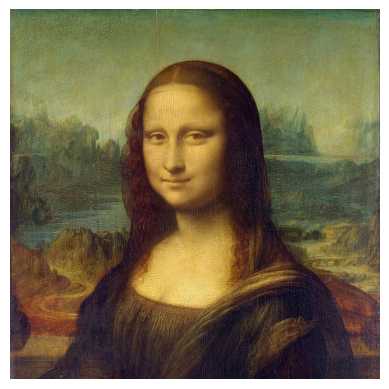

In [6]:
Source_Image = "/content/user_upload/Monalisa.jpg"  # @param {type: "string"}
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
def display_image(image_path):
    # Read the image using matplotlib.image.imread
    img = mpimg.imread(image_path)

    # Display the image using matplotlib.pyplot.imshow
    plt.imshow(img)
    plt.axis('off')  # Turn off axis labels
    plt.show()
display_image(Source_Image)

In [7]:
#@title Copy this code and paste it in next cell then run the cell
%cd /content/roop
from IPython.display import clear_output
clear_output()
command=f"!python run.py --target /content/input.mp4 --source {Source_Image} -o {video_save_path} --execution-provider cuda --frame-processor face_swapper face_enhancer"
command

'!python run.py --target /content/input.mp4 --source /content/user_upload/Monalisa.jpg -o /content/gdrive/MyDrive/video/roop_test_7713cc.mp4 --execution-provider cuda --frame-processor face_swapper face_enhancer'

In [8]:
!python run.py --target /content/input.mp4 --source /content/user_upload/Monalisa.jpg -o /content/gdrive/MyDrive/video/roop_test_7713cc.mp4 --execution-provider cuda --frame-processor face_swapper face_enhancer

Applied providers: ['CUDAExecutionProvider', 'CPUExecutionProvider'], with options: {'CPUExecutionProvider': {}, 'CUDAExecutionProvider': {'prefer_nhwc': '0', 'tunable_op_max_tuning_duration_ms': '0', 'enable_skip_layer_norm_strict_mode': '0', 'tunable_op_tuning_enable': '0', 'use_ep_level_unified_stream': '0', 'device_id': '0', 'has_user_compute_stream': '0', 'gpu_mem_limit': '18446744073709551615', 'gpu_external_alloc': '0', 'gpu_external_free': '0', 'gpu_external_empty_cache': '0', 'cudnn_conv_algo_search': 'EXHAUSTIVE', 'cudnn_conv1d_pad_to_nc1d': '0', 'arena_extend_strategy': 'kNextPowerOfTwo', 'do_copy_in_default_stream': '1', 'enable_cuda_graph': '0', 'cudnn_conv_use_max_workspace': '1', 'tunable_op_enable': '0'}}
find model: /content/roop/checkpoints/models/buffalo_l/1k3d68.onnx landmark_3d_68 ['None', 3, 192, 192] 0.0 1.0
Applied providers: ['CUDAExecutionProvider', 'CPUExecutionProvider'], with options: {'CPUExecutionProvider': {}, 'CUDAExecutionProvider': {'prefer_nhwc': '0'

In [10]:
print(f"You can find the output video in Google Drive inside 'video' folder. {video_save_path}")

You can find the output video in Google Drive inside 'video' folder. /content/gdrive/MyDrive/video/roop_test_7713cc.mp4
